Kamil Koniak - s26766@pjatk.edu.pl - MHE - Raport1

W załączonym zbiorze danych diabetes.csv znajdują się dane kobiet indiańskiego pochodzenia z USA, które zachorowały lub nie zachorowały na cukrzycę. 

Sprawdź jak działają poznane klasyfikatory na tej bazie danych.

Dokonaj porównania:

• k-NN, k=3

• k-NN, k=5

• k-NN, k=11

• Naiwny bayesowski

• Drzewa decyzyjne

Rozwiązanie:

Zaczynam od importów:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(np.abs(-1))

from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1


Wczytuje dane z pliku csv:

In [15]:
file_path = "C:/Users/kamil/Downloads/diabetes.csv"
df = pd.read_csv(file_path)

a) Podziel w losowy sposób bazę danych na zbiór treningowy (67%) i testowy (33%).

Podział danych na cechy (X) i etykiety (y). Wszystkie kolumny poza 'Outcome' to cechy. Kolumna 'Outcome' to etykieta (czy osoba ma cukrzycę czy nie)

In [16]:
X = df.drop(columns=['Outcome'])
y = df['Outcome'] 

Podział na zbiór treningowy (67%) i testowy (33%)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"Rozmiar zbioru treningowego: {X_train.shape[0]} próbek")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]} próbek")

Rozmiar zbioru treningowego: 514 próbek
Rozmiar zbioru testowego: 254 próbek


b) Uruchom każdy z klasyfikatorów wykorzystując paczki i dokonaj ewaluacji na zbiorze testowym wyświetlając procentową dokładność i macierz błędu

Funkcja do obrazowania macierzy błędów

In [18]:
def plot_confusion_matrix_from_cm(cm, labels=None, title="Confusion Matrix"):
    if labels is None:
        labels = [0, 1]
        
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, 
                annot=True,
                fmt='d',
                cmap='Blues', 
                cbar=False,
                xticklabels=labels,
                yticklabels=labels)

    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(title)
    
    quadrant_labels = {
        (0, 0): "True\nNegative",
        (0, 1): "False\nPositive",
        (1, 0): "False\nNegative",
        (1, 1): "True\nPositive"
    }
    
    ax = plt.gca()
    for (i, j), text_label in quadrant_labels.items():
        ax.text(j + 0.5, i + 0.3, text_label,
                ha='center', va='center',
                color='black', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

k-NN, k=3

Dokładność (ang. accuracy): 67.32%
Raport klasyfikacji dla k-NN, k=3:

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       168
           1       0.52      0.58      0.55        86

    accuracy                           0.67       254
   macro avg       0.64      0.65      0.65       254
weighted avg       0.68      0.67      0.68       254



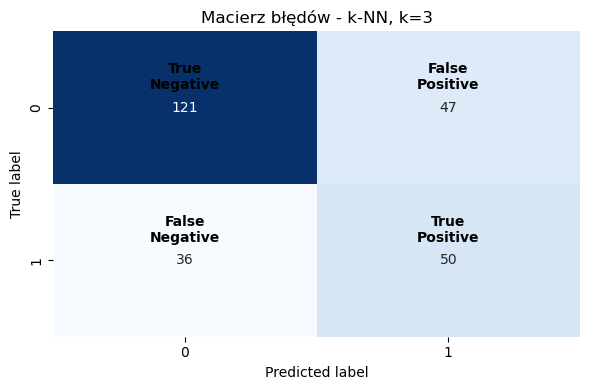

In [19]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_knn3 = knn3.predict(X_test)
acc_knn3 = accuracy_score(y_test, y_pred_knn3) * 100
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
print(f"Dokładność (ang. accuracy): {acc_knn3:.2f}%")
report = classification_report(y_test, y_pred_knn3)
print("Raport klasyfikacji dla k-NN, k=3:\n")
print(report)
plot_confusion_matrix_from_cm(cm_knn3, labels=[0,1], title="Macierz błędów - k-NN, k=3")

k-NN, k=5

Dokładność (ang. accuracy): 70.08%
Raport klasyfikacji dla k-NN, k=5:

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       168
           1       0.56      0.56      0.56        86

    accuracy                           0.70       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



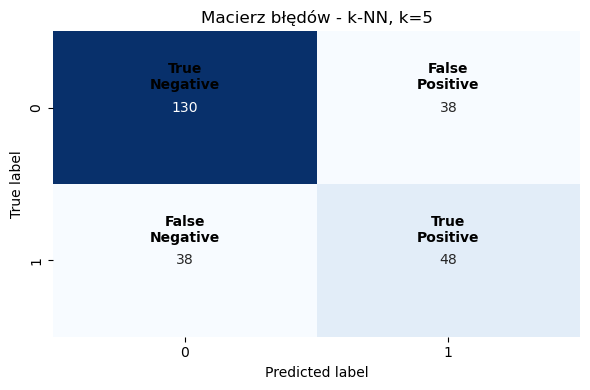

In [20]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_knn5 = knn5.predict(X_test)
acc_knn5 = accuracy_score(y_test, y_pred_knn5) * 100
cm_knn5 = confusion_matrix(y_test, y_pred_knn5)
print(f"Dokładność (ang. accuracy): {acc_knn5:.2f}%")
report = classification_report(y_test, y_pred_knn5)
print("Raport klasyfikacji dla k-NN, k=5:\n")
print(report)
plot_confusion_matrix_from_cm(cm_knn5, labels=[0,1], title="Macierz błędów - k-NN, k=5")

k-NN, k=11

Dokładność (ang. accuracy): 72.44%
Raport klasyfikacji dla kNN, k=11:

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       168
           1       0.62      0.48      0.54        86

    accuracy                           0.72       254
   macro avg       0.69      0.66      0.67       254
weighted avg       0.71      0.72      0.71       254



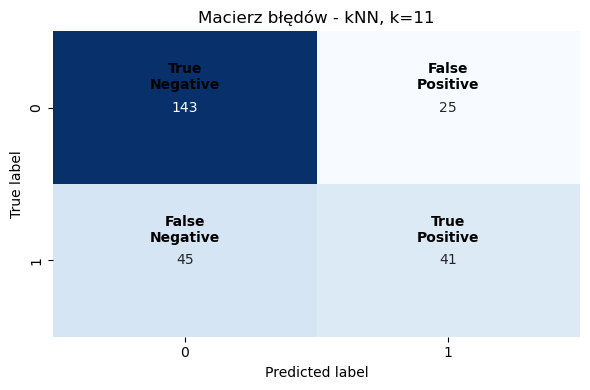

In [21]:
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train, y_train)
y_pred_knn11 = knn11.predict(X_test)
acc_knn11 = accuracy_score(y_test, y_pred_knn11) * 100
cm_knn11 = confusion_matrix(y_test, y_pred_knn11)
print(f"Dokładność (ang. accuracy): {acc_knn11:.2f}%")
report = classification_report(y_test, y_pred_knn11)
print("Raport klasyfikacji dla kNN, k=11:\n")
print(report)
plot_confusion_matrix_from_cm(cm_knn11, labels=[0,1], title="Macierz błędów - kNN, k=11")

Naiwny bayesowski

Są to różne warianty klasyfikatora Naiwnego Bayesa. Wszystkie opierają się na tej samej podstawowej zasadzie wykorzystania twierdzenia Bayesa przy założeniu niezależności cech, ale różnią się przyjmowanymi założeniami dotyczącymi rozkładu danych:

GaussianNB – zakłada, że cechy mają rozkład normalny, co sprawdza się przy danych ciągłych.

MultinomialNB – najlepiej radzi sobie z danymi reprezentującymi liczby (np. częstotliwości słów), czyli danymi dyskretnymi.

BernoulliNB – przeznaczony dla danych binarnych, gdzie cechy przyjmują wartość 0 lub 1.

ComplementNB – modyfikacja MultinomialNB, która lepiej radzi sobie z niezbalansowanymi danymi.

CategoricalNB – zaprojektowany specjalnie do pracy z cechami kategorycznymi.

Mimo że są to różne implementacje, wszystkie zaliczamy do rodziny algorytmów Naiwnego Bayesa. Wybór odpowiedniego wariantu zależy od charakterystyki Twoich danych.

Wybrałem GaussianNB, ponieważ w tym zbiorze danych cechy (np. poziom glukozy, ciśnienie, BMI itp.) są zmiennymi ciągłymi, a GaussianNB zakłada, że cechy mają rozkład normalny. W wielu przypadkach medycznych parametrów taka aproksymacja jest wystarczająco trafna.

Pozostałe warianty Naiwnego Bayesa, takie jak BernoulliNB czy MultinomialNB, są zaprojektowane do pracy z danymi dyskretnymi lub liczbowymi (np. liczbami zdarzeń, cechami binarnymi), co niekoniecznie odpowiada charakterystyce danych w tym zadaniu. Dlatego GaussianNB jest naturalnym wyborem przy analizie tego typu danych.

Naiwny Bayesowski:
Dokładność (ang. accuracy): 73.62%
Raport klasyfikacji dla Naiwny Bayes:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.61      0.63      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



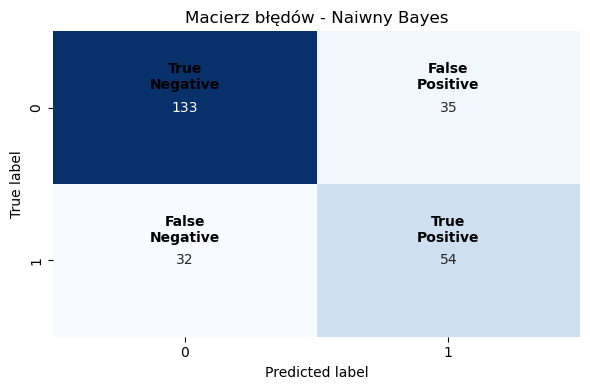

In [22]:
 
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb) * 100
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naiwny Bayesowski:")
print(f"Dokładność (ang. accuracy): {acc_nb:.2f}%")
report = classification_report(y_test, y_pred_nb)
print("Raport klasyfikacji dla Naiwny Bayes:\n")
print(report)
plot_confusion_matrix_from_cm(cm_nb, labels=[0,1], title="Macierz błędów - Naiwny Bayes")

Drzewa decyzyjne

Drzewa decyzyjne:
Dokładność: 71.26%
Raport klasyfikacji dla Drzew decyzyjnych:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       168
           1       0.57      0.62      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.69       254
weighted avg       0.72      0.71      0.72       254



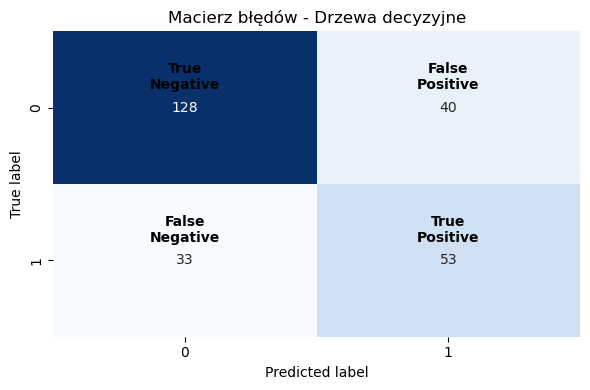

In [23]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt) * 100
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Drzewa decyzyjne:")
print(f"Dokładność: {acc_dt:.2f}%")
report = classification_report(y_test, y_pred_dt)
print("Raport klasyfikacji dla Drzew decyzyjnych:\n")
print(report)
plot_confusion_matrix_from_cm(cm_dt, labels=[0,1], title="Macierz błędów - Drzewa decyzyjne")

c) Nanieś wszystkie dokładności klasyfikatorów na wykres słupkowy. Każdy słupek
odpowiada jednemu klasyfikatorowi, a wysokość słupka to jego dokładność
procentowa. Jeśli trzeba to dodaj legendę.

Listy z nazwami klasyfikatorów i odpowiadającymi im dokładnościami

In [24]:
classifiers = ["k-NN (k=3)", "k-NN (k=5)", "k-NN (k=11)", "Naiwny Bayesowski", "Drzewa decyzyjne"]
accuracies = [acc_knn3, acc_knn5, acc_knn11, acc_nb, acc_dt]

Definicja kolorów dla słupków

In [25]:
colors = ["blue", "orange", "green", "red", "purple"]

Tworzenie wykresu słupkowego

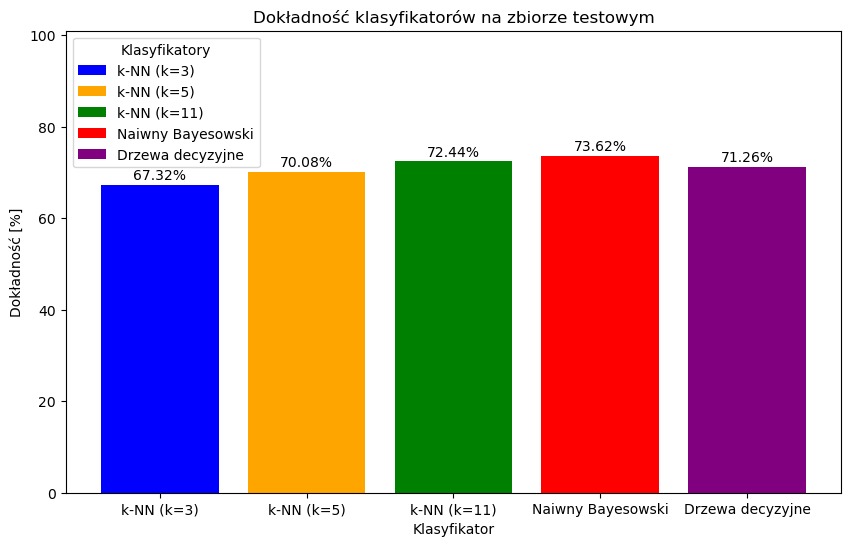

In [26]:
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom')

plt.ylim(0, 101)
plt.xlabel("Klasyfikator")
plt.ylabel("Dokładność [%]")
plt.title("Dokładność klasyfikatorów na zbiorze testowym")

legend_elements = [Patch(facecolor=colors[i], label=classifiers[i]) for i in range(len(classifiers))]
plt.legend(handles=legend_elements, title="Klasyfikatory")
plt.show()

d) Pytanie dodatkowe:
Chcemy zminimalizować błędy, gdy klasyfikator chore osoby klasyfikuje jako zdrowe ( i
odsyła do domu bez leków). Który z klasyfikatorów najbardziej się do tego nadaje?


Jeżeli głównym celem jest zminimalizowanie sytuacji, w której osoba chora zostaje sklasyfikowana jako zdrowa (czyli minimalizacja false negatives). 

Najmniejsza liczba false negatives zwykle oznacza najwyższą czułość (recall) dla klasy dodatniej. 

Najlepiej potwierdzić to, sprawdzając w *classification_report* wartość recall dla klasy 1.

Z raportów wynika, że najbardziej nadaje się klasyfikator *Drzewa decyzyjne*.